In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("E:\ML-Projects\heart-data\healthcare-dataset-stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.shape

(5110, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
# Exploring the Data

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']


# Print the columns

print("We have {} numerical feature : {}".format(len(numerical_features),numerical_features))
print("\nWe have {} categorical feature : {}".format(len(categorical_features),categorical_features))

We have 7 numerical feature : ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical feature : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [12]:
# Proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('-------------------')

gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
-------------------
ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
-------------------
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
-------------------
Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
-------------------
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64
-------------------


Univarite Analysis


Numerical Features

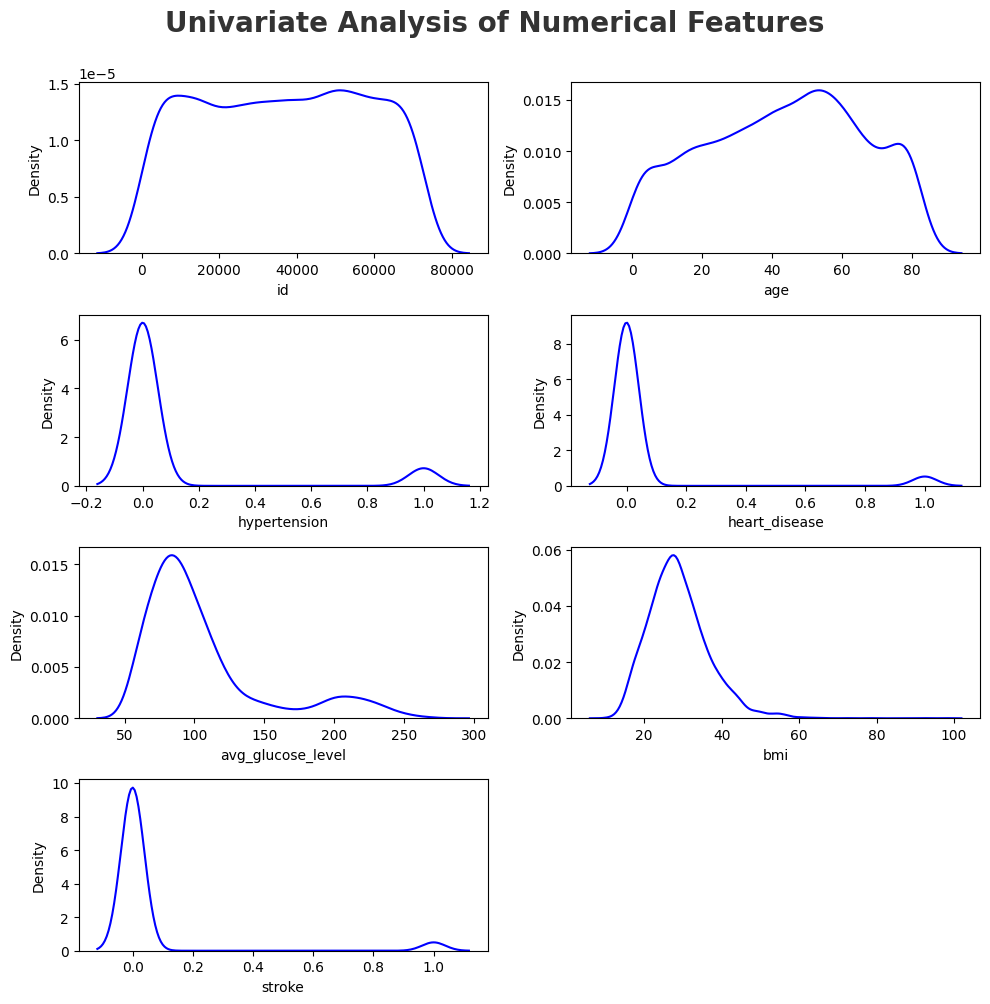

In [13]:
plt.figure(figsize=(10,10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight='bold',alpha=0.8,y=1)

for i in    range(0,len(numerical_features)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x=df[numerical_features[i]],color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    

Univariate Analysis for Categoricval Features

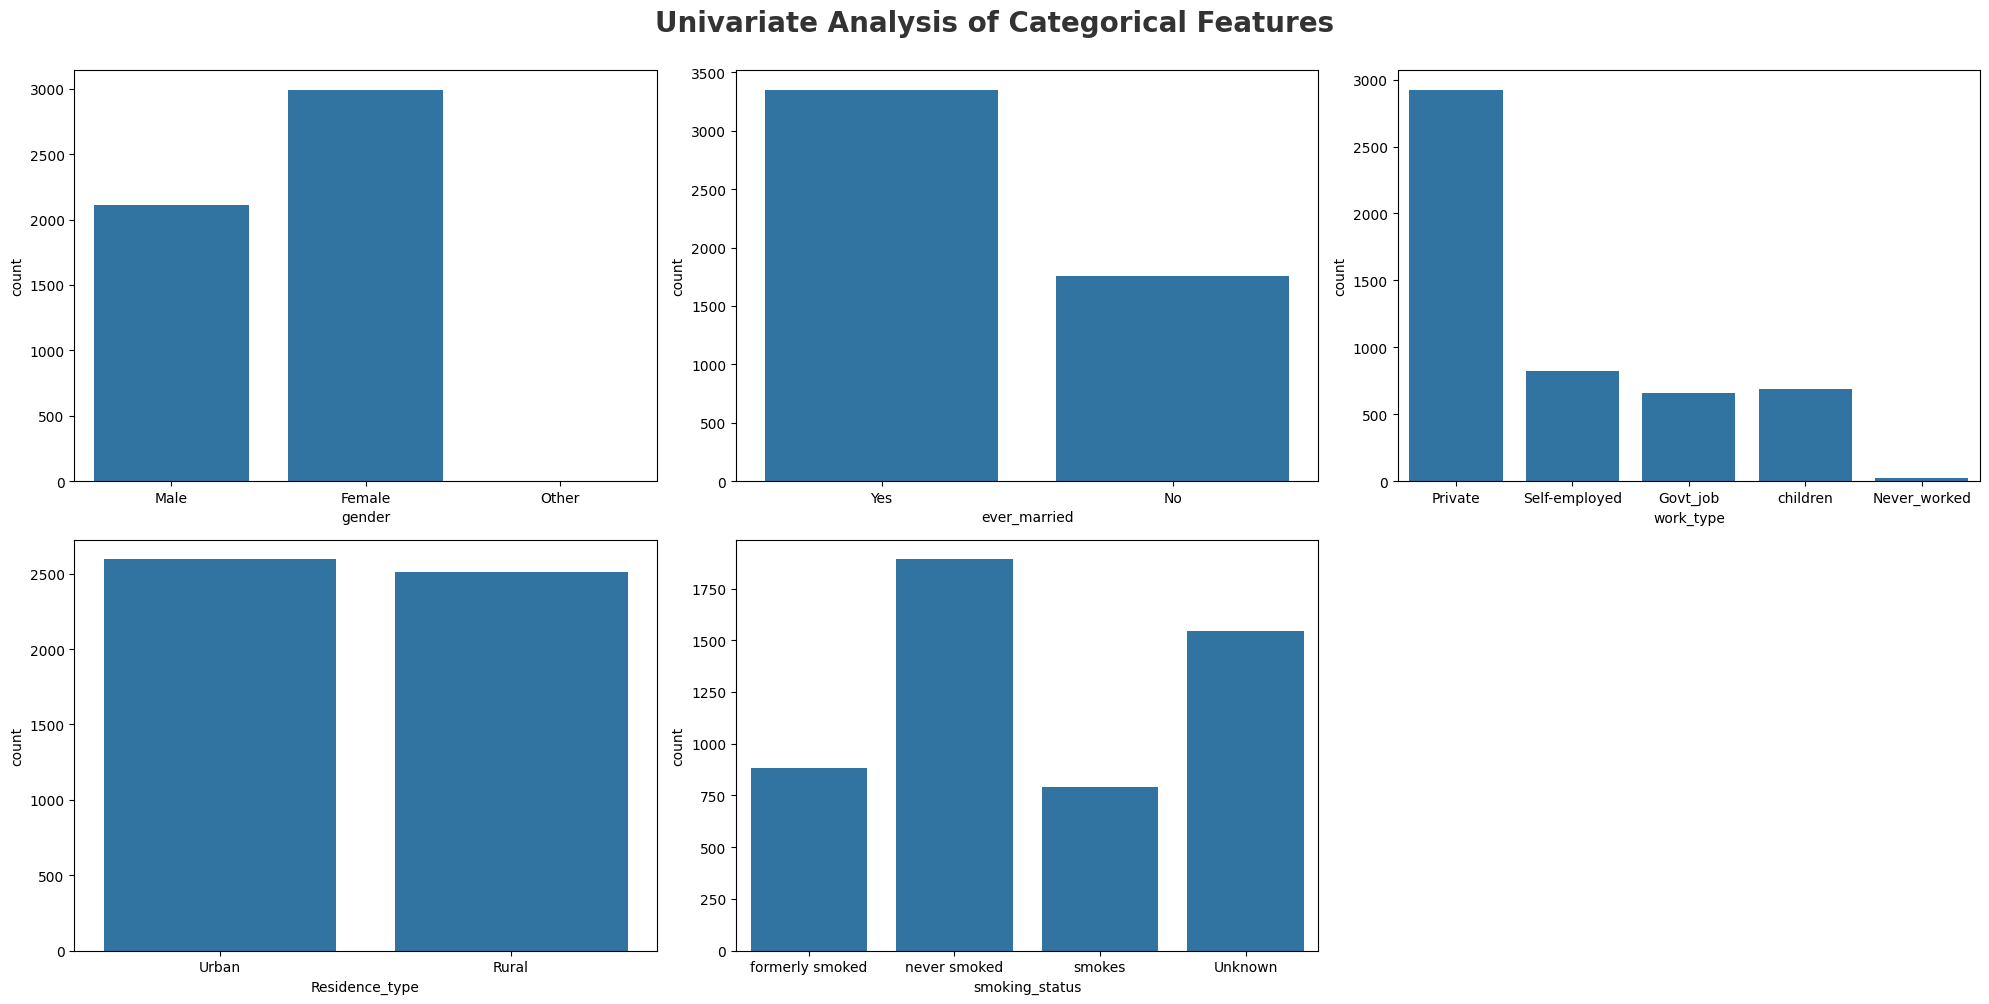

In [17]:
# For categorial features

plt.figure(figsize=(20,10))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()


Multivariate Analysis

In [23]:
# This code is to check which numerical col in of which type
discrete_features=[feature for feature in numerical_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>5)]

continuous_features=[feature for feature in numerical_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numerical_features if len(df[feature].unique()) <=5]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 4 continuous_features : ['id', 'age', 'avg_glucose_level', 'bmi']

We have 3 encoded_categorical : ['hypertension', 'heart_disease', 'stroke']


In [21]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']


Checking the Multicollinearity among the Numerical Features



In [22]:
df[(list(df[continuous_features])[1:])].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000
